In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("/home/mete/train.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
# percentages of nan values in columns
num_null = {col:(df[col].isnull().sum()*100/df.shape[0]).round(4) for col in df.columns if df[col].isnull().sum()>0}

In [6]:
for column,percentage in num_null.items():
    print(column, " "*(30-len(column)), "%", percentage)

LotFrontage                     % 17.7397
Alley                           % 93.7671
MasVnrType                      % 0.5479
MasVnrArea                      % 0.5479
BsmtQual                        % 2.5342
BsmtCond                        % 2.5342
BsmtExposure                    % 2.6027
BsmtFinType1                    % 2.5342
BsmtFinType2                    % 2.6027
Electrical                      % 0.0685
FireplaceQu                     % 47.2603
GarageType                      % 5.5479
GarageYrBlt                     % 5.5479
GarageFinish                    % 5.5479
GarageQual                      % 5.5479
GarageCond                      % 5.5479
PoolQC                          % 99.5205
Fence                           % 80.7534
MiscFeature                     % 96.3014


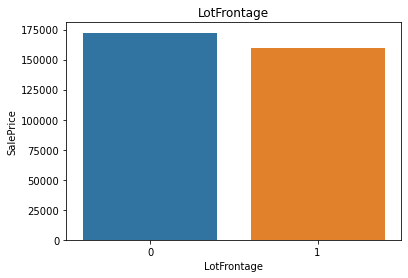

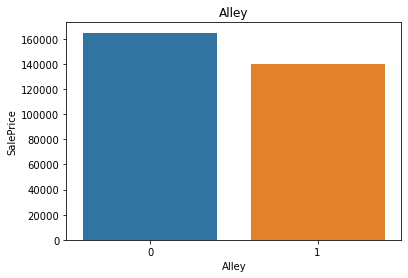

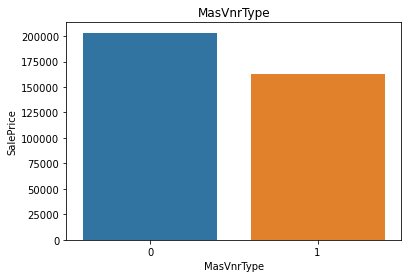

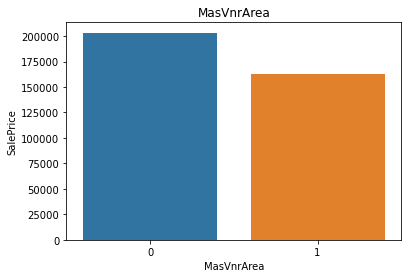

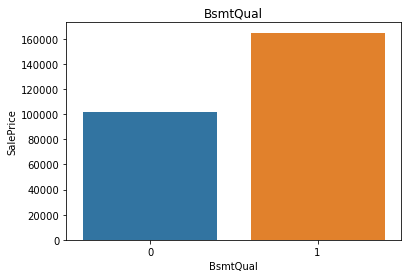

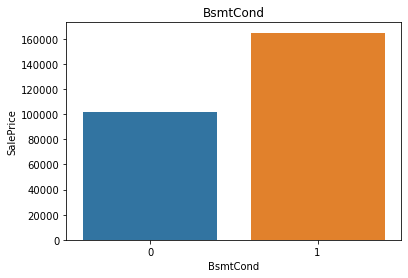

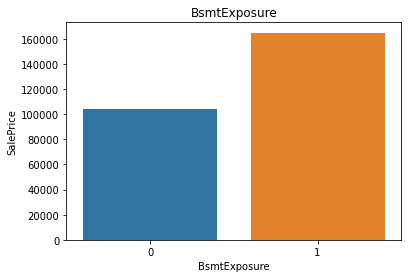

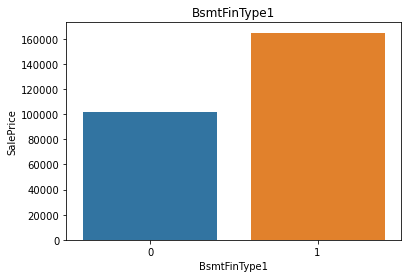

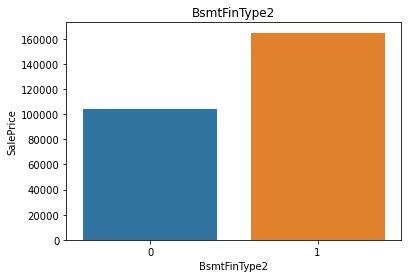

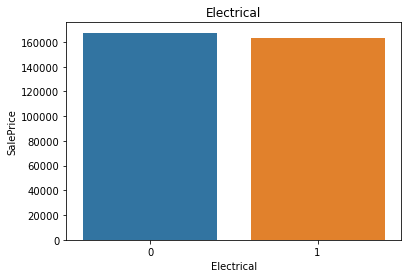

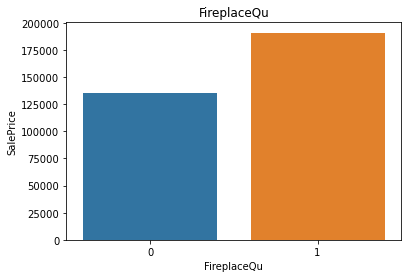

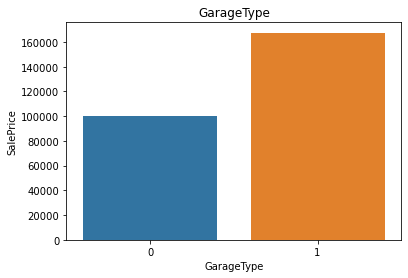

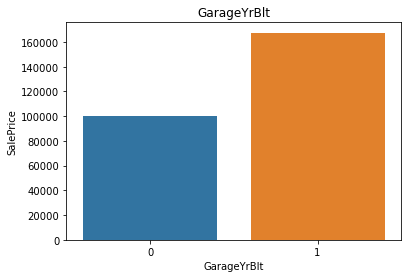

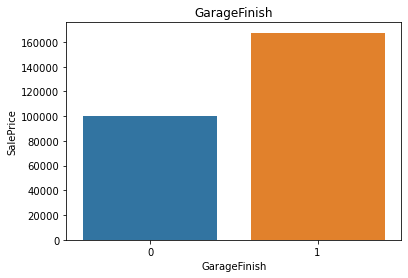

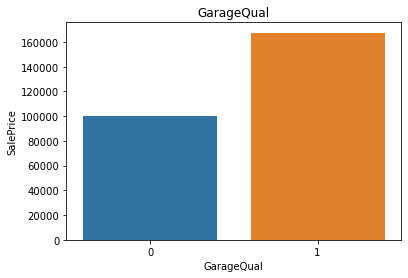

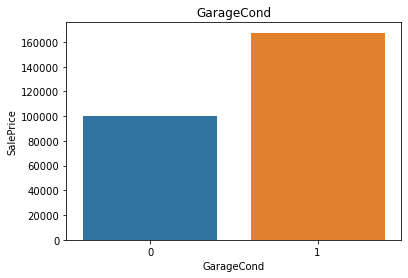

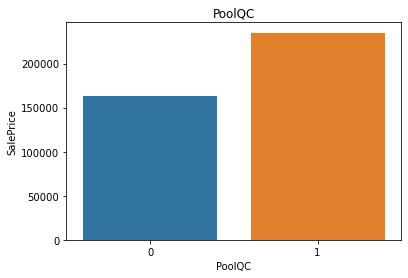

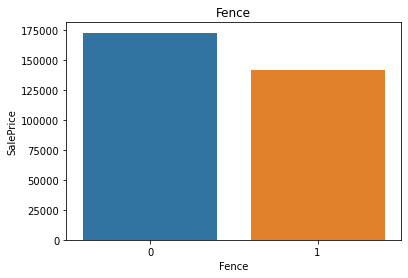

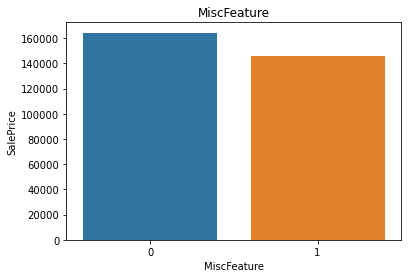

In [7]:
# finding out whether nan values effect sale price based on columns nan values and non-nan values median
data = df.copy()

for feature in num_null.keys():
    # let's make a variable that indicates 0 if the observation was missing or 1 otherwise
    data[feature] = np.where(data[feature].isnull(), 0, 1)
    
    # let's calculate the mean SalePrice where the information is missing or present
    sns.barplot(x=data.groupby(feature)['SalePrice'].median().index, y=data.groupby(feature)['SalePrice'].median())
    plt.title(feature)
    plt.show()

#### As seen from diagram, there is relationship between nan-values and sale prices

In [8]:
# numerical features
numerical_fea= [column for column in df.columns if df[column].dtype != "O"]
print("number of numerical features: %i" %len(numerical_fea))
df[numerical_fea].head()

number of numerical features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# List of features which contains year information
year_feat = [feat for feat in numerical_fea if "Year" in feat or "Yr" in feat]
year_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
for unique_years in year_feat:
    print("{}:\n{}".format(unique_years, df[unique_years].unique()))
    print()

YearBuilt:
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd:
[2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt:
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 

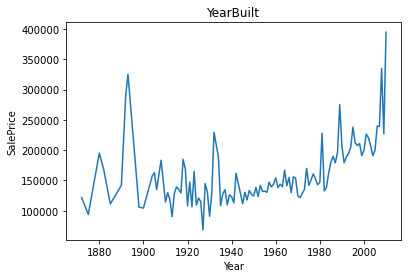

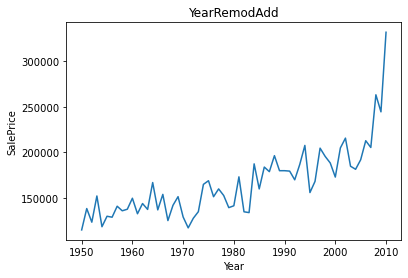

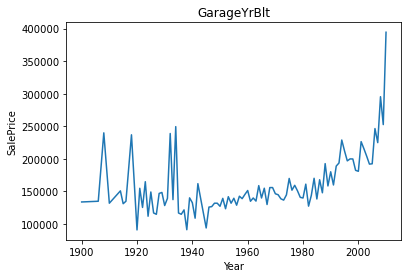

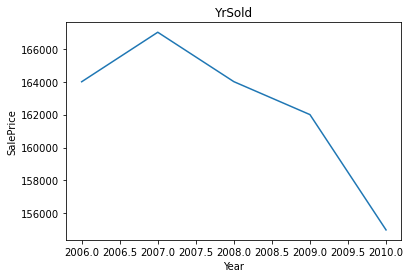

In [11]:
# lets analyst temporal year features and house sale prices

for features in year_feat:
    df.groupby(features)["SalePrice"].median().plot(kind="line");
    plt.xlabel("Year")
    plt.ylabel("SalePrice")
    plt.title(features)
    plt.show()

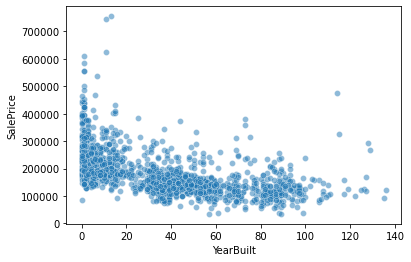

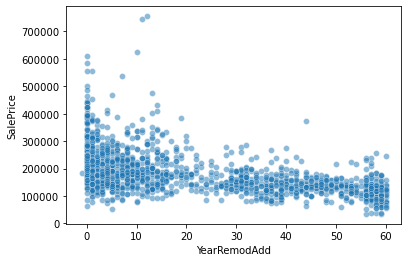

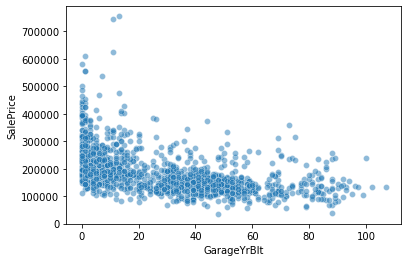

In [12]:
# comparing age of structure and sale price
for feat in year_feat:
    if feat != "YrSold":
        sns.scatterplot(x=df["YrSold"]-df[feat], y=df["SalePrice"], alpha=0.5)
        plt.xlabel(feat)
        plt.show()

In [13]:
df[numerical_fea]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [14]:
# discreate numerical features
discreate_numerical = [feat for feat in numerical_fea if len(df[feat].unique())<25 and feat not in year_feat+["Id"]]
discreate_numerical

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [15]:
df[discreate_numerical].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


Number of discreate features: 17


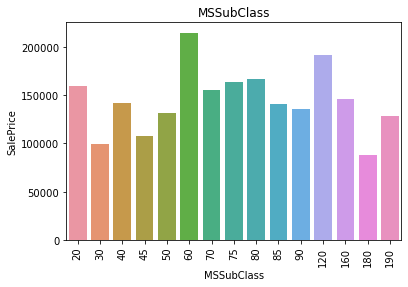

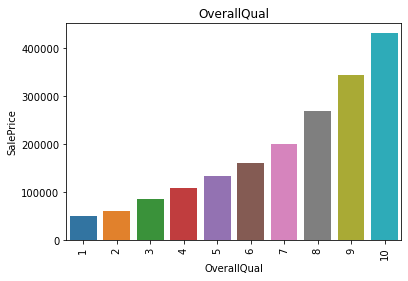

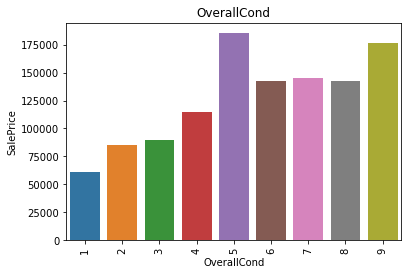

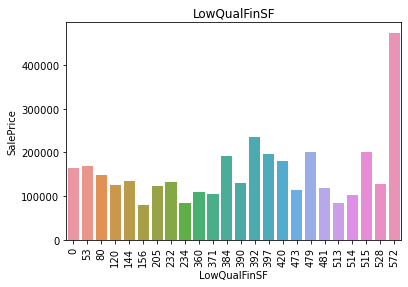

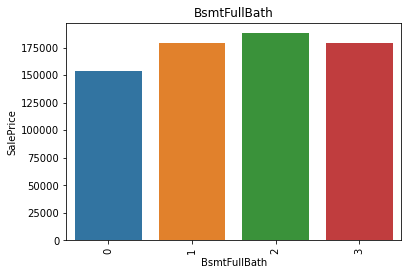

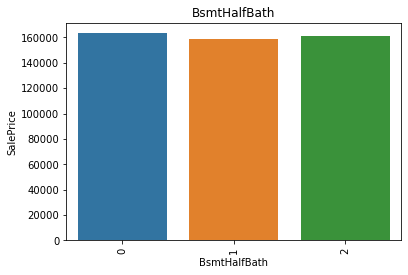

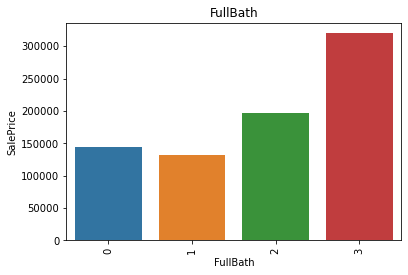

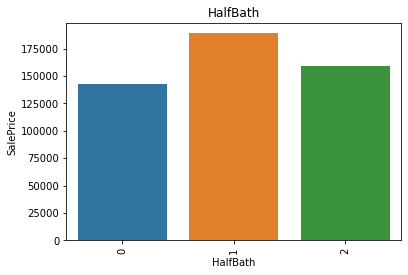

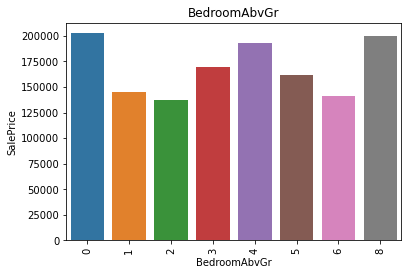

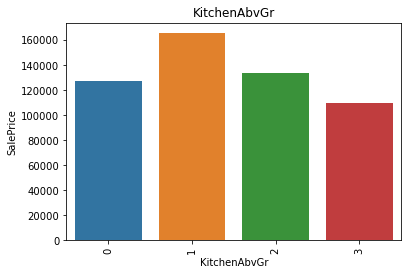

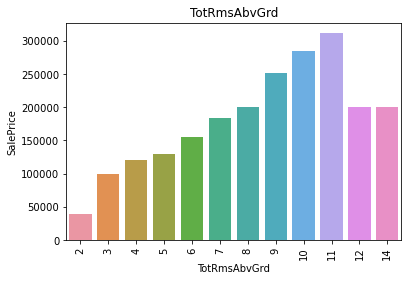

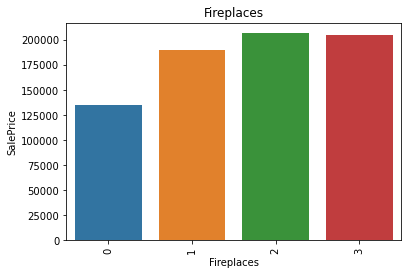

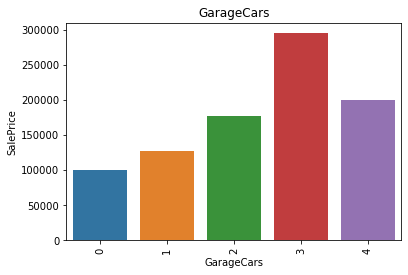

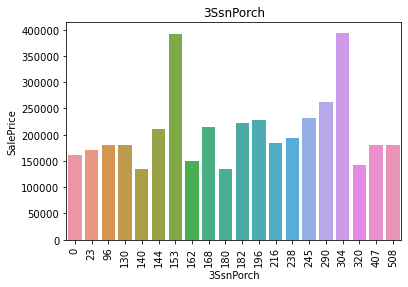

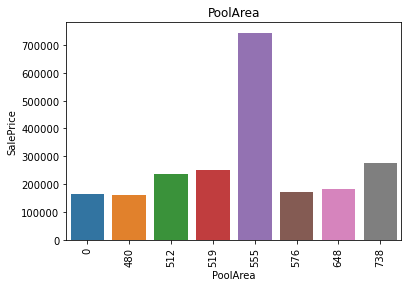

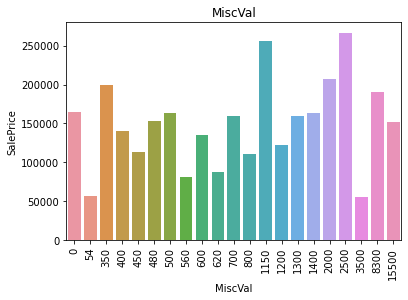

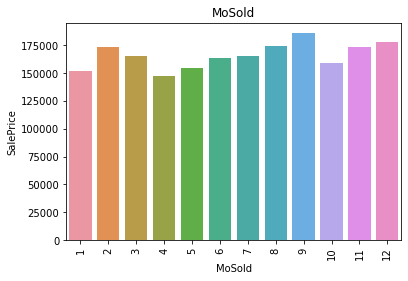

In [16]:
# relationship between discreate features and sale price
data = df.copy()
print("Number of discreate features: %i" %len(discreate_numerical))
for disc_feat in discreate_numerical:
        sns.barplot(x=data.groupby(disc_feat)["SalePrice"].median().index, 
                    y=data.groupby(disc_feat)["SalePrice"].median())
        plt.ylabel("SalePrice") 
        plt.title(disc_feat)
        plt.xticks(rotation=90)
        plt.show()

In [17]:
continous_numerical = [feat for feat in numerical_fea if feat not in discreate_numerical+year_feat+["Id"]]
continous_numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [18]:
data.groupby(disc_feat)["SalePrice"].median()

MoSold
1     151650.0
2     173250.0
3     165250.0
4     147000.0
5     154000.0
6     163000.0
7     165195.0
8     174450.0
9     185900.0
10    159000.0
11    173000.0
12    178000.0
Name: SalePrice, dtype: float64

Number of continious features: 16


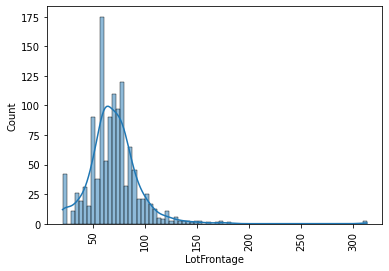

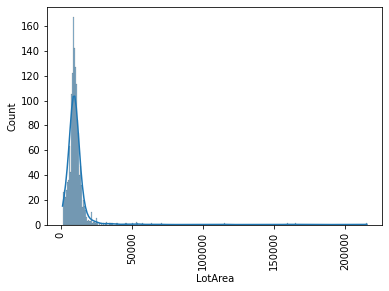

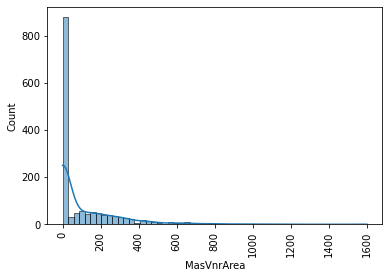

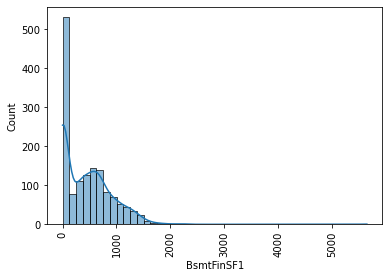

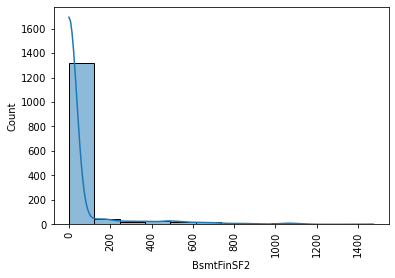

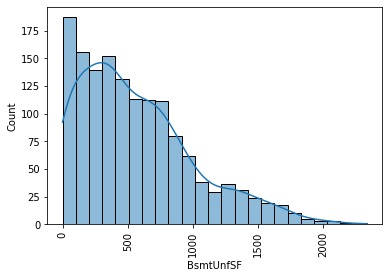

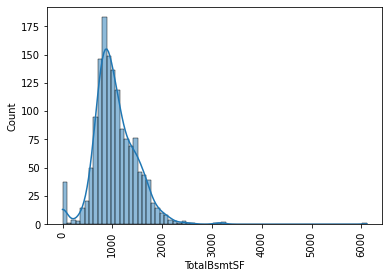

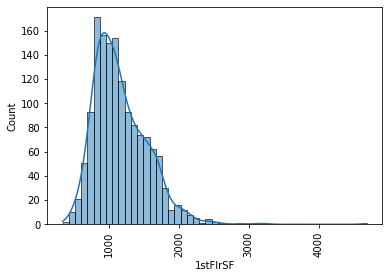

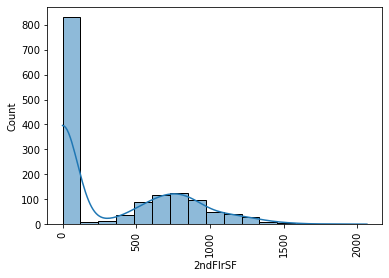

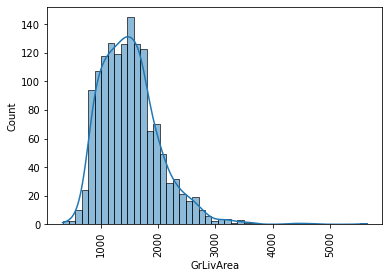

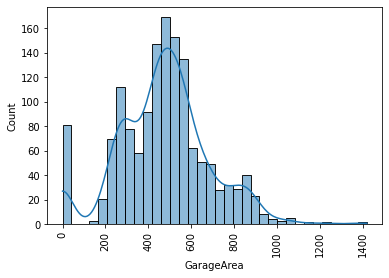

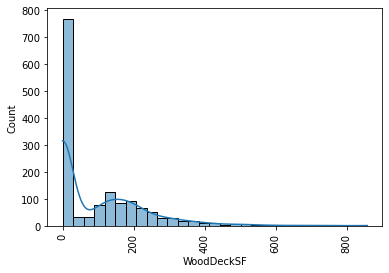

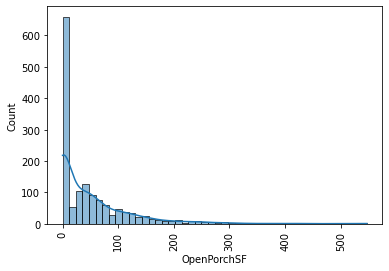

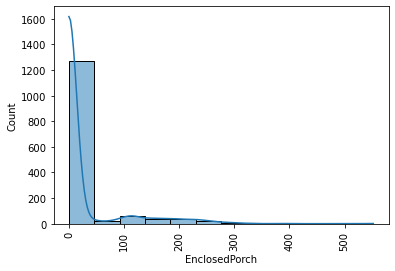

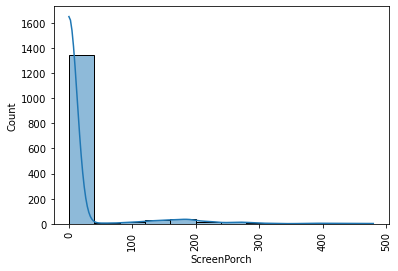

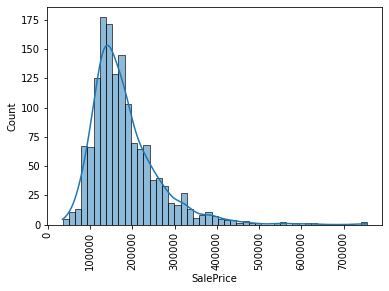

In [19]:
# continous features distribution based on sale price
data = df.copy()
print("Number of continious features: %i" %len(continous_numerical))

for con_feat in continous_numerical:
    sns.histplot(data[con_feat], kde=True) 
    plt.xticks(rotation=90)
    plt.show()

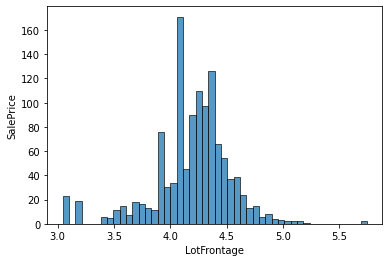

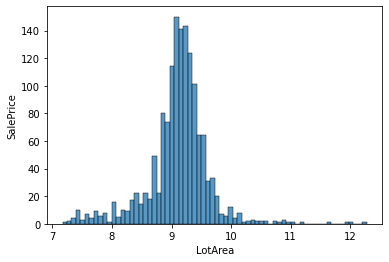

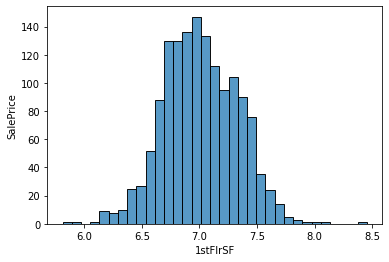

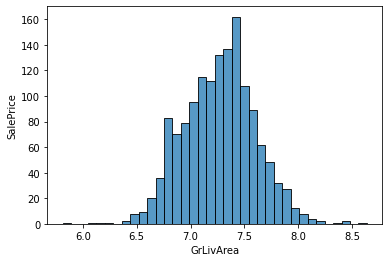

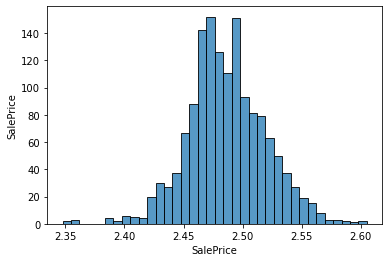

In [20]:
# Applying logoratmic transformation to continious features for log normal distribution
for con_feat in continous_numerical:
    data = df.copy()
    # log0 is undefined
    if 0 in data[con_feat].unique():
        pass
    
    else:    
        data[con_feat] = np.log(data[con_feat])
        data["SalePrice"] = np.log(data["SalePrice"])
        sns.histplot(data[con_feat])
        plt.ylabel("SalePrice")
        plt.show()

## OUTLIERS for continious features

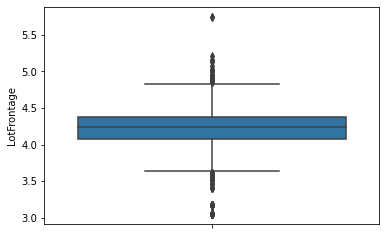

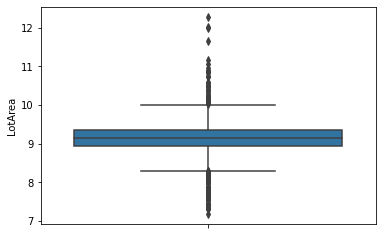

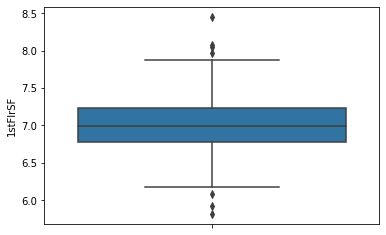

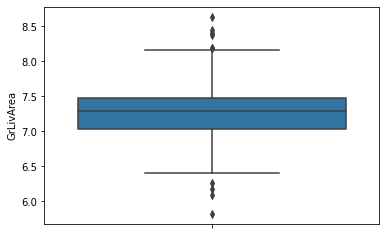

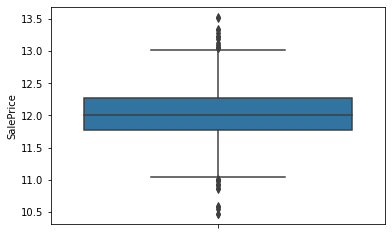

In [21]:
for feat in continous_numerical:
    data = df.copy()
    if 0 in data[feat].unique():
        pass
    
    else:
        data[feat] = np.log(data[feat])
        sns.boxplot(y=data[feat])
        plt.ylabel(feat)
        plt.show()

## Categorical variables

In [22]:
categorical_features = [category for category in df.columns if df[category].dtype=="O"]
print("Number of categorical features: %i" %len(categorical_features))
categorical_features

Number of categorical features: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
# number of unique categories in categorical features
for category in categorical_features:
    print("{}".format(category), " "*(20-len(category)), "{}".format(len(df[category].unique())))

MSZoning              5
Street                2
Alley                 3
LotShape              4
LandContour           4
Utilities             2
LotConfig             5
LandSlope             3
Neighborhood          25
Condition1            9
Condition2            8
BldgType              5
HouseStyle            8
RoofStyle             6
RoofMatl              8
Exterior1st           15
Exterior2nd           16
MasVnrType            5
ExterQual             4
ExterCond             5
Foundation            6
BsmtQual              5
BsmtCond              5
BsmtExposure          5
BsmtFinType1          7
BsmtFinType2          7
Heating               6
HeatingQC             5
CentralAir            2
Electrical            6
KitchenQual           4
Functional            7
FireplaceQu           6
GarageType            7
GarageFinish          4
GarageQual            6
GarageCond            6
PavedDrive            3
PoolQC                4
Fence                 5
MiscFeature           5
SaleType     

#### we need to handle categorical features which have a lot of categories

In [24]:
df.groupby(category)["SalePrice"].median()

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

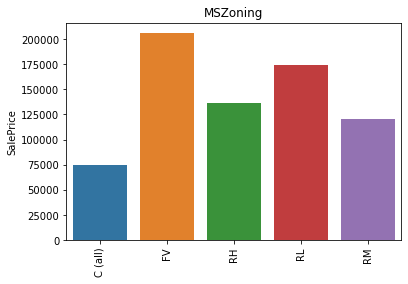

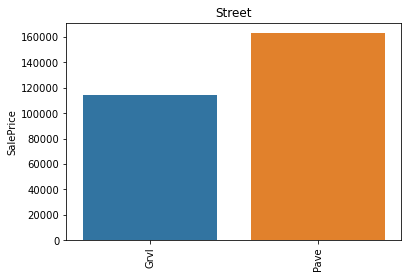

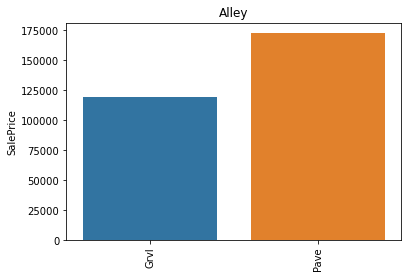

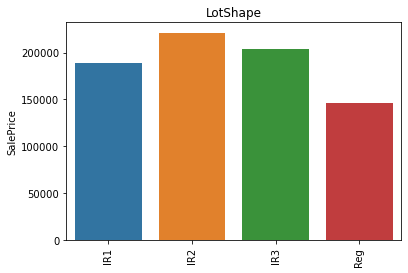

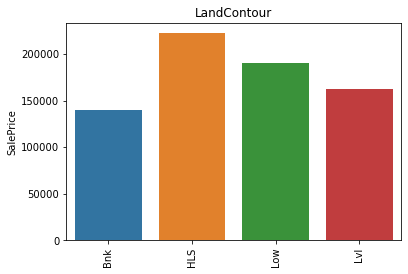

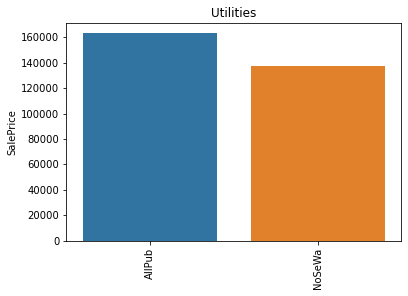

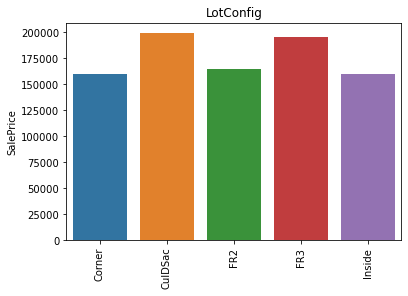

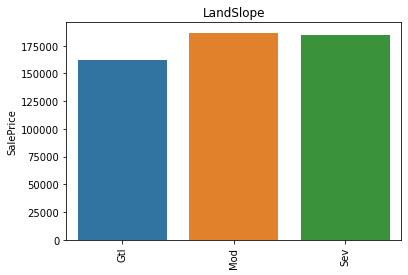

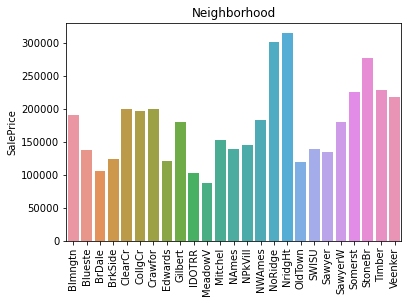

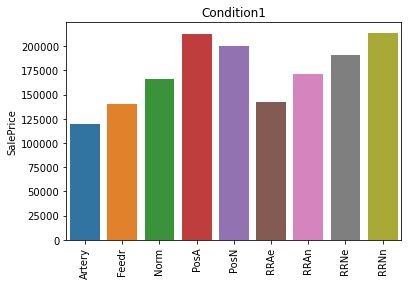

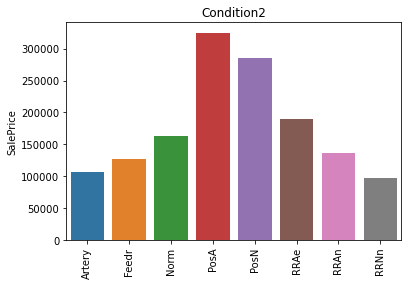

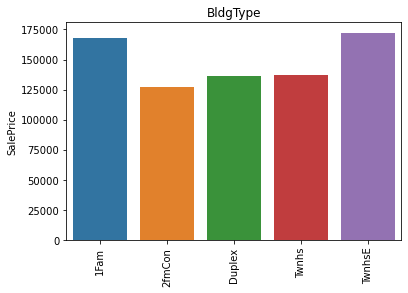

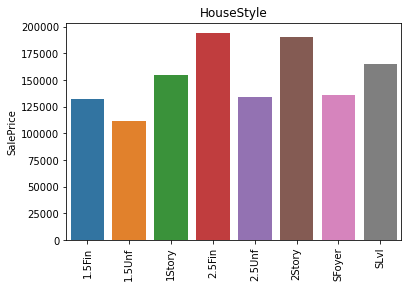

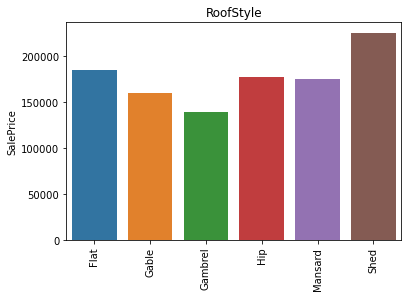

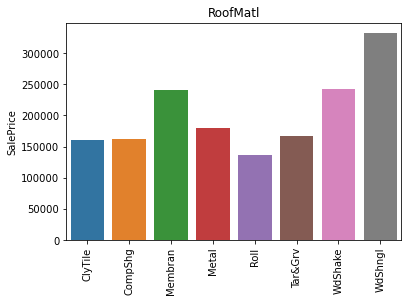

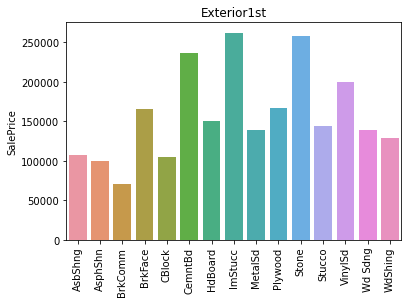

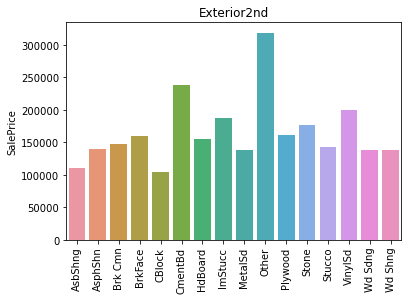

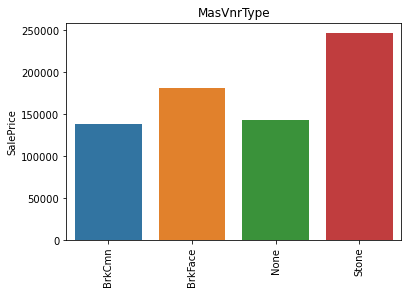

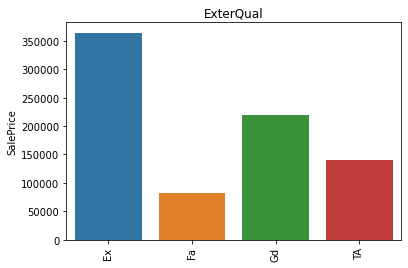

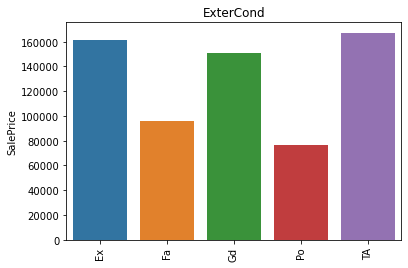

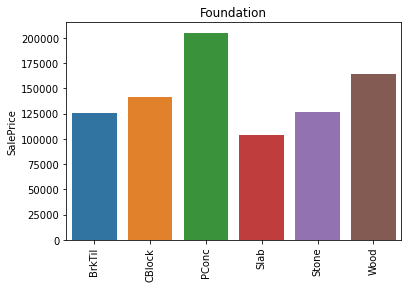

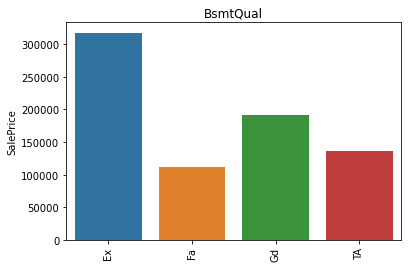

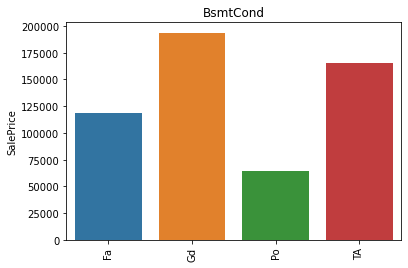

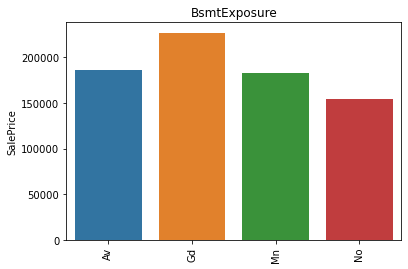

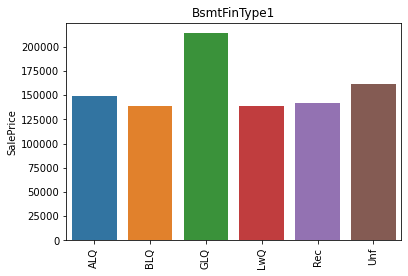

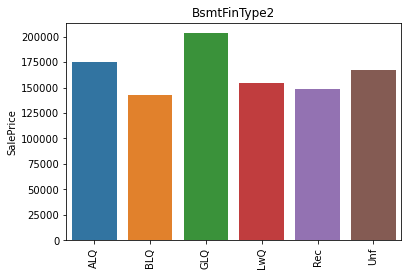

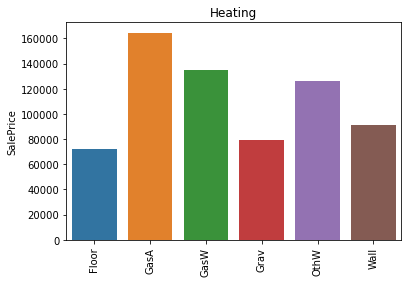

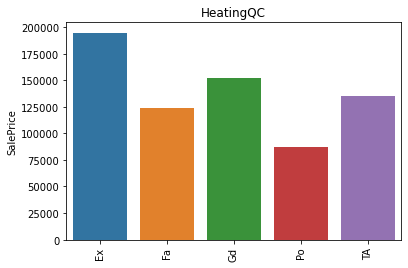

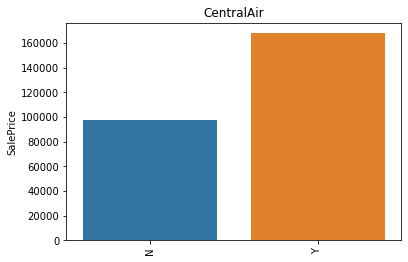

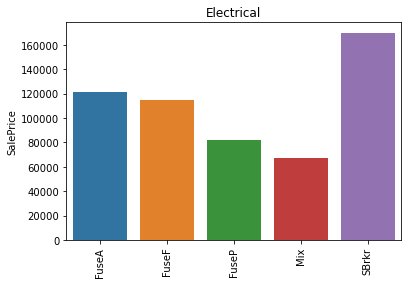

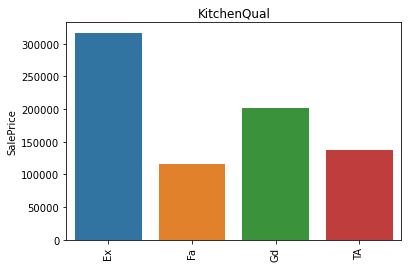

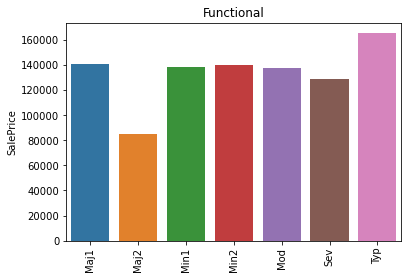

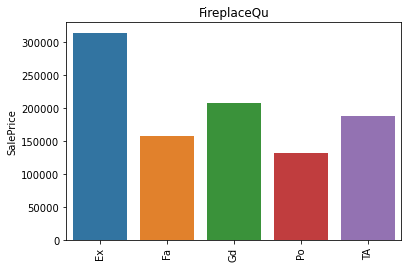

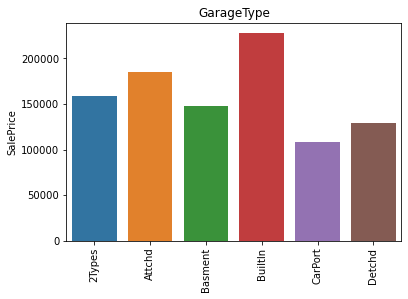

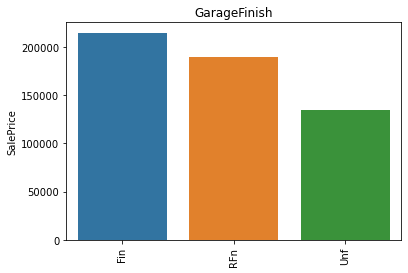

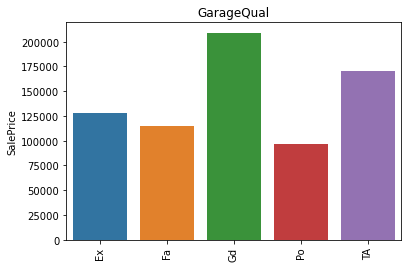

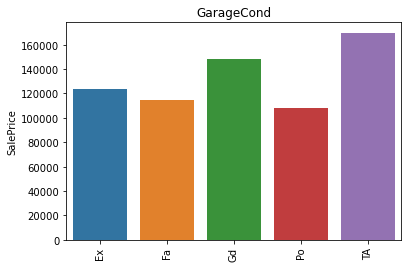

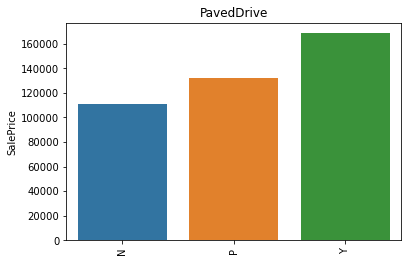

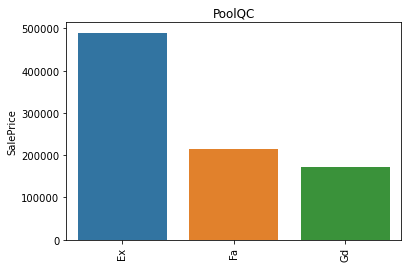

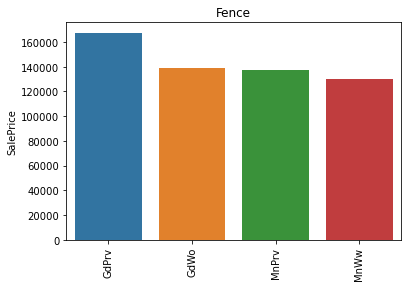

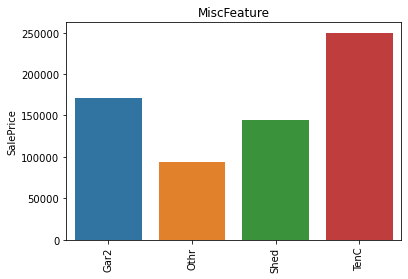

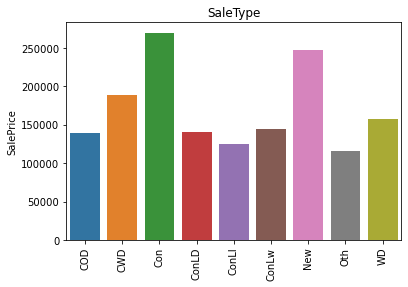

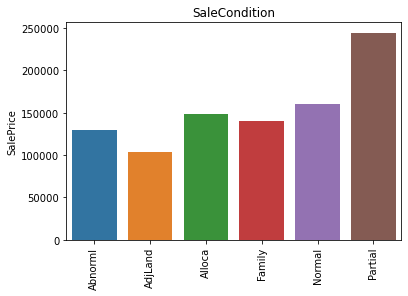

In [25]:
# plotting relationship between categorical feaetures and saleprice
for category in categorical_features:
    sns.barplot(x=df.groupby(category)["SalePrice"].median().index,
                y=df.groupby(category)["SalePrice"].median().values)
    plt.ylabel("SalePrice")
    plt.xlabel("")
    plt.title(category)
    plt.xticks(rotation=90)
    plt.show()

# Feature Engineering

### Handling with nan-value categorical features

In [26]:
# categorical features with nan-value/s and percentages
nan_category = [cat_nan for cat_nan in categorical_features if df[cat_nan].isnull().sum()>0]
for n_c in nan_category:
    print("{}".format(n_c), " "*(15-len(n_c)), "=> %{}".format((df[n_c].isnull().sum()*100/len(df)).round(2)))

Alley            => %93.77
MasVnrType       => %0.55
BsmtQual         => %2.53
BsmtCond         => %2.53
BsmtExposure     => %2.6
BsmtFinType1     => %2.53
BsmtFinType2     => %2.6
Electrical       => %0.07
FireplaceQu      => %47.26
GarageType       => %5.55
GarageFinish     => %5.55
GarageQual       => %5.55
GarageCond       => %5.55
PoolQC           => %99.52
Fence            => %80.75
MiscFeature      => %96.3


In [27]:
# filling categorical features nan-values with "missing"
df[nan_category] = df[nan_category].fillna("missing")

In [28]:
df[nan_category].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

## Handling with nan-value numerical features

In [29]:
# numerical features with nan-values and percentages
num_feat_nan = [num_nan for num_nan in df.columns if df[num_nan].dtype != "O" and df[num_nan].isnull().sum()>1]
for n_n in num_feat_nan:
    print("{}".format(n_n), " "*(15-len(n_n)), "=> %{}".format((df[n_n].isnull().sum()*100/len(df)).round(2)))

LotFrontage      => %17.74
MasVnrArea       => %0.55
GarageYrBlt      => %5.55


In [30]:
# filling numerical nan-values with features median and creating new feature indicates filled instances
for n_c_n in num_feat_nan:
    median_value = df[n_c_n].median()
    
    # 1 for nan-values 0 for otherwise
    df[n_c_n+"_nan"] = np.where(df[n_c_n].isnull(), 1, 0)
    df[n_c_n] = df[n_c_n].fillna(median_value)

In [31]:
# checking whether any numerical nan values remains
df[num_feat_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [32]:
# converting these numerical features into normal distribution
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
for feat in num_features:
    df[feat] = np.log(df[feat])

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216,0,0,0


## Handling Rare Categorical Features

In [34]:
# if categories in categorical feature is less than %1, change it as "Rare_var", otherwise remain the same
# capturing each unqiue categorical feature
for feature in categorical_features:
    # capturing percentage of each unqiue category inside of related categorical feature
    tmp = df.groupby(feature)["SalePrice"].count() / len(df)
    # capturing each category names inside of related categorical feature which have more than %1 density
    tmp_df = tmp[tmp>0.01].index
    # if df[related_cat_feat] is inside of above, remain the same, otherwise change it as "Rare_var"
    df[feature] = np.where(df[feature].isin(tmp_df), df[feature], "Rare_var")

## Mapping Categorical Features into Numerical Values

In [35]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

## Feature Scaling

In [36]:
# feature seperation
X = df.drop(labels=["SalePrice", "Id"], axis=1)
y = df["SalePrice"]

In [37]:
# train-test split for scaling to prevent data leackage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Scaling / Normalization / Min-MaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
# concatinating scaled train-test data
scaled_df = pd.concat([pd.DataFrame(scaled_X_train), pd.DataFrame(scaled_X_test)])

In [40]:
# resetting scaled_df index
scaled_df.index = range(1460)

In [41]:
# resetting scaled_df column names
scaled_df.columns = df.columns.drop(labels=["Id", "SalePrice"])

In [42]:
# df all dataset as scaled numerical features 3 added _nan features('LotFrontage_nan', 'MasVnrArea_nan', 'GarageYrBlt_nan')
df_all = pd.concat([scaled_df, df["Id"], df["SalePrice"]], axis=1)

In [43]:
df_all.to_csv("/home/mete/dfd_all.csv", index=False)

# Feature Selection

In [44]:
df = pd.read_csv("/home/mete/dfd_all.csv")

In [45]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,Id,SalePrice
0,0.000000,0.75,0.495064,0.406983,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.545455,0.4,1.0,0.75,0.6,0.666667,0.625,0.710145,0.333333,1.0,0.0,0.7,0.7,0.50,0.208999,0.333333,1.0,1.0,0.50,0.75,0.25,0.833333,0.000000,0.833333,0.000000,0.558219,0.213421,1.0,0.75,1.0,1.0,0.611775,0.000000,0.0,0.571872,0.000000,0.0,0.666667,0.0,0.375,0.5,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.636364,0.333333,0.50,0.373766,0.666667,1.0,1.0,0.114352,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.363636,0.50,0.666667,0.75,0.0,0.0,0.0,1,12.247694
1,0.941176,0.25,0.189077,0.203387,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.227273,0.4,1.0,1.00,0.8,0.444444,0.500,0.963768,0.916667,0.0,0.0,1.0,1.0,0.50,0.058055,0.333333,1.0,1.0,0.75,0.75,1.00,1.000000,0.096917,0.833333,0.000000,0.000000,0.089525,1.0,0.75,1.0,1.0,0.441306,0.000000,0.0,0.412522,0.333333,0.0,0.333333,0.0,0.250,0.5,0.333333,0.250000,1.0,0.000000,0.2,0.6,0.954545,1.000000,0.50,0.370240,0.666667,1.0,1.0,0.000000,0.051188,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.00,0.666667,0.75,0.0,0.0,0.0,2,12.109011
2,0.235294,1.00,0.456066,0.370696,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.818182,0.4,1.0,0.75,1.0,0.666667,0.500,0.992754,0.983333,0.0,0.0,1.0,1.0,0.25,0.000000,0.333333,1.0,1.0,0.75,0.75,0.50,1.000000,0.004252,0.833333,0.000000,0.313356,0.123732,1.0,1.00,1.0,1.0,0.313126,0.379177,0.0,0.542275,0.000000,0.0,0.666667,0.5,0.375,0.5,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.990909,0.333333,0.50,0.433004,0.666667,1.0,1.0,0.197200,0.082267,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.454545,1.00,0.333333,0.75,0.0,0.0,0.0,3,12.317167
3,0.000000,0.75,0.513123,0.429532,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.818182,0.6,1.0,0.75,0.6,0.888889,0.500,0.971014,0.933333,1.0,0.0,1.0,0.6,1.00,0.219158,1.000000,1.0,1.0,1.00,1.00,0.25,0.833333,0.000000,0.833333,0.000000,0.815497,0.311784,1.0,1.00,1.0,1.0,0.658889,0.000000,0.0,0.615913,0.000000,0.0,0.666667,0.0,0.375,0.5,1.000000,0.500000,1.0,0.333333,0.8,0.8,0.963636,1.000000,0.75,0.555712,0.666667,1.0,1.0,0.000000,0.349177,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.181818,0.25,0.666667,0.75,0.0,0.0,0.0,4,11.849398
4,0.235294,0.75,0.265271,0.411944,1.0,1.0,1.000000,0.333333,1.0,1.00,0.0,0.636364,1.0,1.0,0.75,1.0,0.666667,0.625,0.898551,0.766667,0.0,0.0,1.0,1.0,0.25,0.000000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.068214,1.000000,0.305235,0.029966,0.130769,1.0,1.00,1.0,1.0,0.343112,0.403874,0.0,0.567428,0.333333,0.0,0.666667,0.5,0.375,0.5,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.872727,0.666667,0.50,0.387870,0.666667,1.0,1.0,0.184364,0.111517,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.272727,0.75,0.333333,0.75,0.0,0.0,0.0,5,12.429216


In [46]:
# capturing numerical features
num_feat = [n_f for n_f in df.columns if df[n_f].dtype != "O"]

# droping dependent feature("saleprice") and unique identifier("Id")
for i in ["Id", "SalePrice"]:
    num_feat.remove(i)

In [47]:
# feature Seperation
X = df[num_feat]
y = df["SalePrice"]

In [48]:
# train-validate-test data split
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=42)

### using lasso-regression and select from model feature selection

In [49]:
# cross-validation for proper alpha value for lasso regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
model = Lasso(random_state=101)

In [52]:
param_grid = {"alpha":np.logspace(0,1,100)}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=101),
             param_grid={'alpha': array([ 1.        ,  1.02353102,  1.04761575,  1.07226722,  1.09749877,
        1.12332403,  1.149757  ,  1.17681195,  1.20450354,  1.23284674,
        1.26185688,  1.29154967,  1.32194115,  1.35304777,  1.38488637,
        1.41747416,  1.45082878,  1.48496826,  1.51991108,  1.55567614,
        1.59228279,  1.62975083,  1.66810054,  1.70735265,  1.7475284 ,
        1.78864...
        4.53487851,  4.64158883,  4.75081016,  4.86260158,  4.97702356,
        5.09413801,  5.21400829,  5.33669923,  5.46227722,  5.59081018,
        5.72236766,  5.85702082,  5.9948425 ,  6.13590727,  6.28029144,
        6.42807312,  6.57933225,  6.73415066,  6.8926121 ,  7.05480231,
        7.22080902,  7.39072203,  7.56463328,  7.74263683,  7.92482898,
        8.11130831,  8.30217568,  8.49753436,  8.69749003,  8.90215085,
        9.11162756,  9.32603347,  9.54548457,  9.77009957, 10.        ])})

In [54]:
preds = grid.predict(X_validate)

In [55]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_validate, preds))

0.4193917589050618

In [56]:
grid.best_params_

{'alpha': 1.0}

In [57]:
# final performance evaulation
model = Lasso(alpha=1, random_state=101)
model.fit(X_train, y_train)
preds_final = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, preds_final))

0.4048751279497489

In [58]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=Lasso(alpha=0.05, random_state=101))

In [59]:
selector.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=101))

In [60]:
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [61]:
# creating new df which with only selected important features

In [62]:
X_train.columns[selector.get_support()]

Index([], dtype='object')

### as seen, we need to signifantly decrease number of alpha

In [63]:
# new model with signifantly reduced alpha
model = Lasso(alpha=0.002, random_state=101)
model.fit(X_train, y_train)

Lasso(alpha=0.002, random_state=101)

In [64]:
# features selection
feature_sel_model = SelectFromModel(estimator=model) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)
selected_feat = X_train.columns[feature_sel_model.get_support()]
selected_feat

Index(['LandContour', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtUnfSF', 'HeatingQC',
       '2ndFlrSF', 'FullBath', 'KitchenQual', 'FireplaceQu', 'GarageQual',
       'Fence', 'YrSold', 'SaleCondition', 'LotFrontage_nan'],
      dtype='object')